## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings_dir = 'Embeddings/'
embeddings = 'Embeddings/ResNet50V2_224_1024.csv'
labels = '../Tabular_data/Label_CSV_All_Municipality.csv'

Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 80
T=3
autoregressive = True

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 3]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, classification=None):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)


In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (124, 2049)
The test shape is: (32, 2049)
The shape of the features is (121, 6147)
The shape of the labels is (121, 1)
The shape of the features is (29, 6147)
The shape of the labels is (29, 1)
The initial shapes are:
The train shape is (121, 6147)
The test shape is (29, 6147)
-----------------------
The Final sha

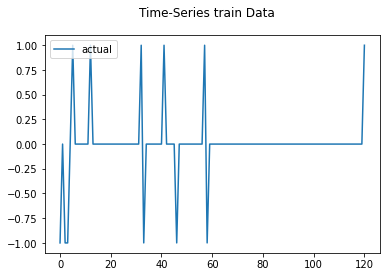

2023-02-23 16:25:23.456230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 16:25:23.456271: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 16:25:23.456294: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-23 16:25:23.456514: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 16:25:25.941530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Evaluate: 
1/1 [==============================] - 0s 29ms/step - loss: 1.1033 - auc: 0.5363 - acc: 0.2759 - f1_score: 0.0000e+00
loss: 1.1033177375793457
auc: 0.5362663269042969
acc: 0.27586206793785095
f1_score: [0. 0. 0.]
{'loss': 1.1033177375793457, 'auc': 0.5362663269042969, 'acc': 0.27586206793785095, 'f1_score': array([0., 0., 0.], dtype=float32)}


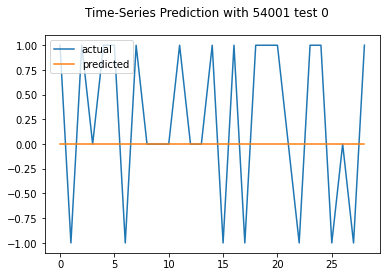

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Evaluate: 
1/1 [==============================] - 0s 51ms/step - loss: 1.0616 - auc: 0.6269 - acc: 0.4483 - f1_score: 0.0000e+00
loss: 1.061610460281372
auc: 0.6269322633743286
acc: 0.4482758641242981
f1_score: [0. 0. 0.]
{'loss': 1.061610460281372, 'auc': 0.6269322633743286, 'acc': 0.4482758641242981, 'f1_score': array([0., 0., 0.], dtype=float32)}


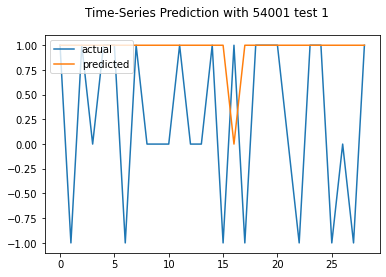

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Evaluate: 
1/1 [==============================] - 0s 29ms/step - loss: 1.0812 - auc: 0.6079 - acc: 0.4483 - f1_score: 0.0000e+00
loss: 1.0812318325042725
auc: 0.6079072952270508
acc: 0.4482758641242981
f1_score: [0. 0. 0.]
{'loss': 1.0812318325042725, 'auc': 0.6079072952270508, 'acc': 0.4482758641242981, 'f1_score': array([0., 0., 0.], dtype=float32)}


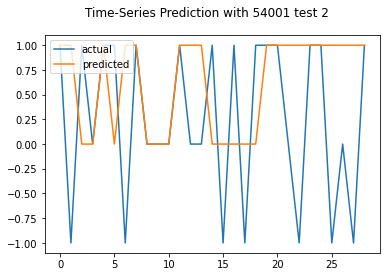

auc : average=0.590, std=0.039
acc : average=0.391, std=0.081
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
##############################################################################################

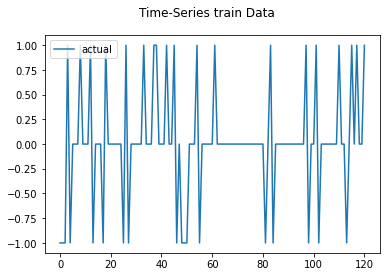

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Evaluate: 
1/1 [==============================] - 0s 37ms/step - loss: 0.8650 - auc: 0.7857 - acc: 0.6552 - f1_score: 0.2553
loss: 0.8649616241455078
auc: 0.7856718301773071
acc: 0.6551724076271057
f1_score: [0.        0.7659574 0.       ]
{'loss': 0.8649616241455078, 'auc': 0.7856718301773071, 'acc': 0.6551724076271057, 'f1_score': array([0.       , 0.7659574, 0.       ], dtype=float32)}


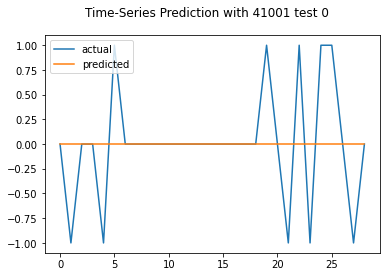

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Evaluate: 
1/1 [==============================] - 0s 69ms/step - loss: 0.8786 - auc: 0.7669 - acc: 0.6552 - f1_score: 0.2639
loss: 0.8785519599914551
auc: 0.7669441103935242
acc: 0.6551724076271057
f1_score: [0.        0.7916667 0.       ]
{'loss': 0.8785519599914551, 'auc': 0.7669441103935242, 'acc': 0.6551724076271057, 'f1_score': array([0.       , 0.7916667, 0.       ], dtype=float32)}


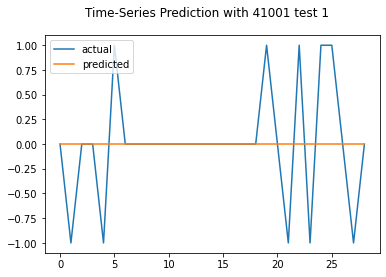

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Evaluate: 
1/1 [==============================] - 0s 29ms/step - loss: 0.8845 - auc: 0.7435 - acc: 0.6552 - f1_score: 0.2639
loss: 0.8844711780548096
auc: 0.7434601783752441
acc: 0.6551724076271057
f1_score: [0.        0.7916667 0.       ]
{'loss': 0.8844711780548096, 'auc': 0.7434601783752441, 'acc': 0.6551724076271057, 'f1_score': array([0.       , 0.7916667, 0.       ], dtype=float32)}


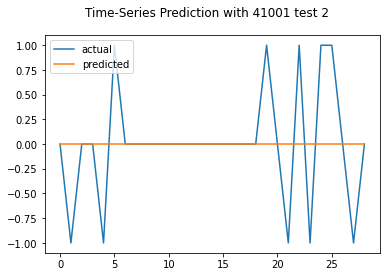

auc : average=0.765, std=0.017
acc : average=0.655, std=0.000
f1_score : average=0.261, std=0.369
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
##############################################################################################

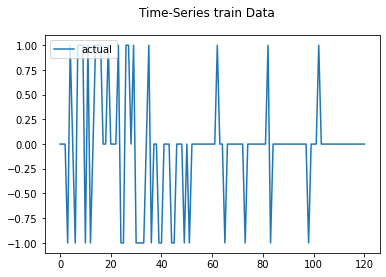

Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Evaluate: 
1/1 [==============================] - 0s 29ms/step - loss: 0.4010 - auc: 0.9435 - acc: 0.8966 - f1_score: 0.3152
loss: 0.40101996064186096
auc: 0.943519651889801
acc: 0.8965517282485962
f1_score: [0.         0.94545454 0.        ]
{'loss': 0.40101996064186096, 'auc': 0.943519651889801, 'acc': 0.8965517282485962, 'f1_score': array([0.        , 0.94545454, 0.        ], dtype=float32)}


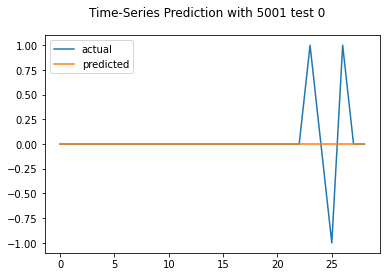

Restoring model weights from the end of the best epoch.
Epoch 00068: early stopping
Evaluate: 
1/1 [==============================] - 0s 65ms/step - loss: 0.3854 - auc: 0.9492 - acc: 0.8966 - f1_score: 0.3152
loss: 0.3853622376918793
auc: 0.9491676092147827
acc: 0.8965517282485962
f1_score: [0.         0.94545454 0.        ]
{'loss': 0.3853622376918793, 'auc': 0.9491676092147827, 'acc': 0.8965517282485962, 'f1_score': array([0.        , 0.94545454, 0.        ], dtype=float32)}


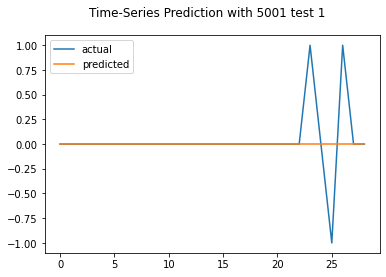

Restoring model weights from the end of the best epoch.
Epoch 00061: early stopping
Evaluate: 
1/1 [==============================] - 0s 29ms/step - loss: 0.3899 - auc: 0.9596 - acc: 0.8966 - f1_score: 0.3152
loss: 0.38987669348716736
auc: 0.9595719575881958
acc: 0.8965517282485962
f1_score: [0.         0.94545454 0.        ]
{'loss': 0.38987669348716736, 'auc': 0.9595719575881958, 'acc': 0.8965517282485962, 'f1_score': array([0.        , 0.94545454, 0.        ], dtype=float32)}


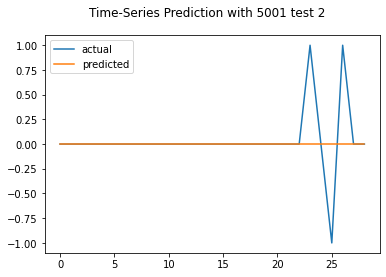

auc : average=0.951, std=0.007
acc : average=0.897, std=0.000
f1_score : average=0.315, std=0.446
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
##############################################################################################

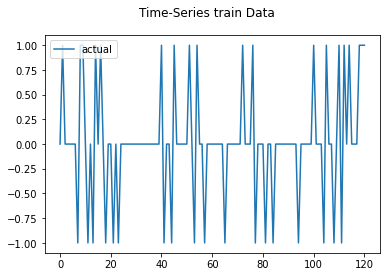

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Evaluate: 
1/1 [==============================] - 0s 44ms/step - loss: 1.0819 - auc: 0.5919 - acc: 0.4138 - f1_score: 0.0000e+00
loss: 1.081936001777649
auc: 0.5918549299240112
acc: 0.4137931168079376
f1_score: [0. 0. 0.]
{'loss': 1.081936001777649, 'auc': 0.5918549299240112, 'acc': 0.4137931168079376, 'f1_score': array([0., 0., 0.], dtype=float32)}


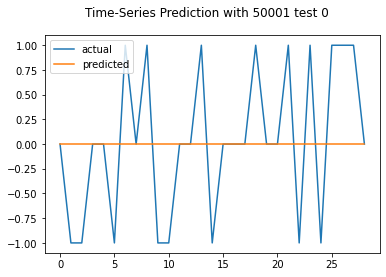

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Evaluate: 
1/1 [==============================] - 0s 63ms/step - loss: 1.0772 - auc: 0.5672 - acc: 0.3448 - f1_score: 0.0000e+00
loss: 1.0771968364715576
auc: 0.5671819448471069
acc: 0.3448275923728943
f1_score: [0. 0. 0.]
{'loss': 1.0771968364715576, 'auc': 0.5671819448471069, 'acc': 0.3448275923728943, 'f1_score': array([0., 0., 0.], dtype=float32)}


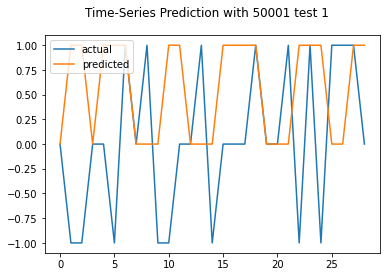

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Evaluate: 
1/1 [==============================] - 0s 30ms/step - loss: 1.0925 - auc: 0.5351 - acc: 0.2414 - f1_score: 0.0000e+00
loss: 1.092451572418213
auc: 0.5350773334503174
acc: 0.24137930572032928
f1_score: [0. 0. 0.]
{'loss': 1.092451572418213, 'auc': 0.5350773334503174, 'acc': 0.24137930572032928, 'f1_score': array([0., 0., 0.], dtype=float32)}


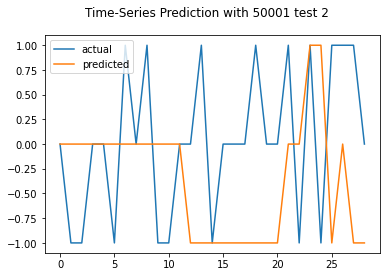

auc : average=0.565, std=0.023
acc : average=0.333, std=0.071
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
##############################################################################################

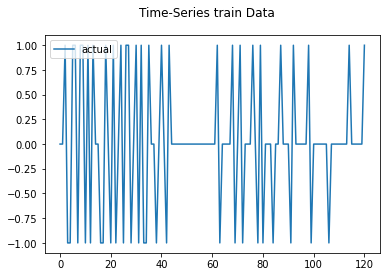

Restoring model weights from the end of the best epoch.
Epoch 00032: early stopping
Evaluate: 
1/1 [==============================] - 0s 34ms/step - loss: 0.8732 - auc: 0.7973 - acc: 0.6552 - f1_score: 0.2639
loss: 0.8731729388237
auc: 0.7972651720046997
acc: 0.6551724076271057
f1_score: [0.        0.7916667 0.       ]
{'loss': 0.8731729388237, 'auc': 0.7972651720046997, 'acc': 0.6551724076271057, 'f1_score': array([0.       , 0.7916667, 0.       ], dtype=float32)}


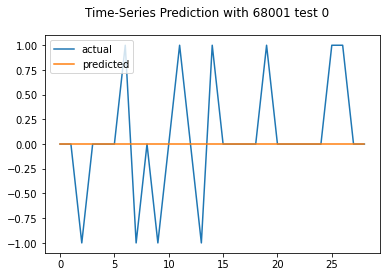

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Evaluate: 
1/1 [==============================] - 0s 68ms/step - loss: 0.8491 - auc: 0.8401 - acc: 0.6552 - f1_score: 0.2639
loss: 0.849108099937439
auc: 0.8400713801383972
acc: 0.6551724076271057
f1_score: [0.        0.7916667 0.       ]
{'loss': 0.849108099937439, 'auc': 0.8400713801383972, 'acc': 0.6551724076271057, 'f1_score': array([0.       , 0.7916667, 0.       ], dtype=float32)}


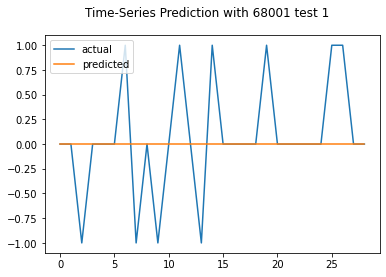

Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Evaluate: 
1/1 [==============================] - 0s 39ms/step - loss: 0.9016 - auc: 0.7337 - acc: 0.6552 - f1_score: 0.2639
loss: 0.9016067385673523
auc: 0.7336503863334656
acc: 0.6551724076271057
f1_score: [0.        0.7916667 0.       ]
{'loss': 0.9016067385673523, 'auc': 0.7336503863334656, 'acc': 0.6551724076271057, 'f1_score': array([0.       , 0.7916667, 0.       ], dtype=float32)}


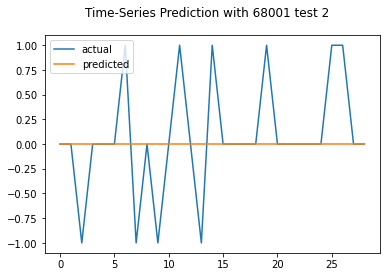

auc : average=0.790, std=0.044
acc : average=0.655, std=0.000
f1_score : average=0.264, std=0.373
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
##############################################################################################

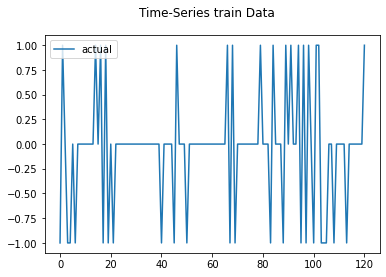

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Evaluate: 
1/1 [==============================] - 0s 33ms/step - loss: 1.1471 - auc: 0.4581 - acc: 0.3448 - f1_score: 0.0000e+00
loss: 1.147122859954834
auc: 0.4580856263637543
acc: 0.3448275923728943
f1_score: [0. 0. 0.]
{'loss': 1.147122859954834, 'auc': 0.4580856263637543, 'acc': 0.3448275923728943, 'f1_score': array([0., 0., 0.], dtype=float32)}


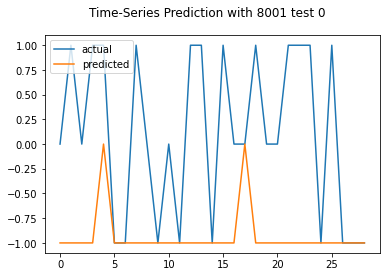

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Evaluate: 
1/1 [==============================] - 0s 35ms/step - loss: 1.0889 - auc: 0.5589 - acc: 0.4138 - f1_score: 0.0000e+00
loss: 1.088890790939331
auc: 0.5588585138320923
acc: 0.4137931168079376
f1_score: [0. 0. 0.]
{'loss': 1.088890790939331, 'auc': 0.5588585138320923, 'acc': 0.4137931168079376, 'f1_score': array([0., 0., 0.], dtype=float32)}


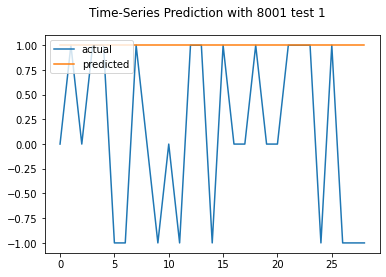

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Evaluate: 
1/1 [==============================] - 0s 49ms/step - loss: 1.1508 - auc: 0.4875 - acc: 0.3448 - f1_score: 0.0000e+00
loss: 1.1507658958435059
auc: 0.487514853477478
acc: 0.3448275923728943
f1_score: [0. 0. 0.]
{'loss': 1.1507658958435059, 'auc': 0.487514853477478, 'acc': 0.3448275923728943, 'f1_score': array([0., 0., 0.], dtype=float32)}


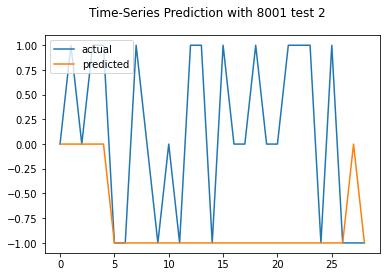

auc : average=0.501, std=0.042
acc : average=0.368, std=0.033
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
##############################################################################################

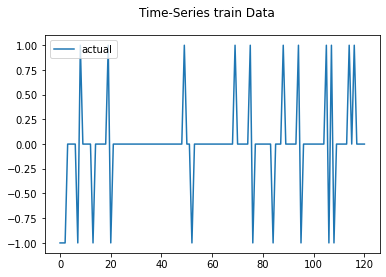

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Evaluate: 
1/1 [==============================] - 0s 44ms/step - loss: 1.1426 - auc: 0.4266 - acc: 0.2759 - f1_score: 0.0000e+00
loss: 1.1426411867141724
auc: 0.42657551169395447
acc: 0.27586206793785095
f1_score: [0. 0. 0.]
{'loss': 1.1426411867141724, 'auc': 0.42657551169395447, 'acc': 0.27586206793785095, 'f1_score': array([0., 0., 0.], dtype=float32)}


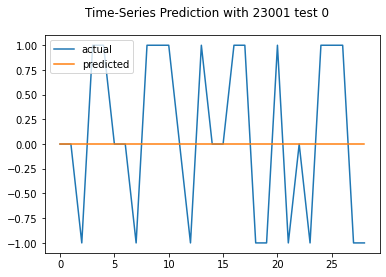

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Evaluate: 
1/1 [==============================] - 0s 45ms/step - loss: 1.1202 - auc: 0.4040 - acc: 0.3103 - f1_score: 0.0000e+00
loss: 1.120185375213623
auc: 0.40398332476615906
acc: 0.3103448152542114
f1_score: [0. 0. 0.]
{'loss': 1.120185375213623, 'auc': 0.40398332476615906, 'acc': 0.3103448152542114, 'f1_score': array([0., 0., 0.], dtype=float32)}


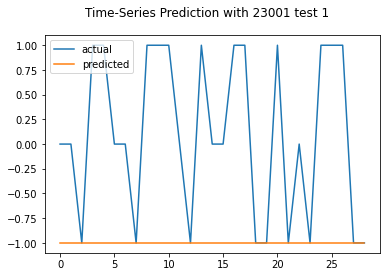

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Evaluate: 
1/1 [==============================] - 0s 37ms/step - loss: 1.1241 - auc: 0.4501 - acc: 0.2759 - f1_score: 0.0000e+00
loss: 1.1240582466125488
auc: 0.4500594735145569
acc: 0.27586206793785095
f1_score: [0. 0. 0.]
{'loss': 1.1240582466125488, 'auc': 0.4500594735145569, 'acc': 0.27586206793785095, 'f1_score': array([0., 0., 0.], dtype=float32)}


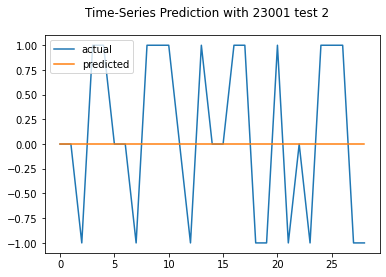

auc : average=0.427, std=0.019
acc : average=0.287, std=0.016
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
##############################################################################################

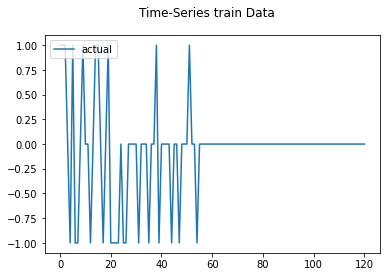

Restoring model weights from the end of the best epoch.
Epoch 00086: early stopping
Evaluate: 
1/1 [==============================] - 0s 39ms/step - loss: 0.1055 - auc: 1.0000 - acc: 1.0000 - f1_score: 0.3275
loss: 0.10548917949199677
auc: 1.0000001192092896
acc: 1.0
f1_score: [0.        0.9824561 0.       ]
{'loss': 0.10548917949199677, 'auc': 1.0000001192092896, 'acc': 1.0, 'f1_score': array([0.       , 0.9824561, 0.       ], dtype=float32)}


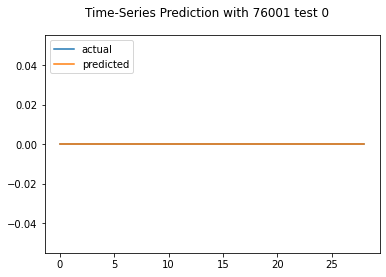

Restoring model weights from the end of the best epoch.
Epoch 00053: early stopping
Evaluate: 
1/1 [==============================] - 0s 40ms/step - loss: 0.0694 - auc: 1.0000 - acc: 1.0000 - f1_score: 0.3333
loss: 0.06938939541578293
auc: 1.0
acc: 1.0
f1_score: [0. 1. 0.]
{'loss': 0.06938939541578293, 'auc': 1.0, 'acc': 1.0, 'f1_score': array([0., 1., 0.], dtype=float32)}


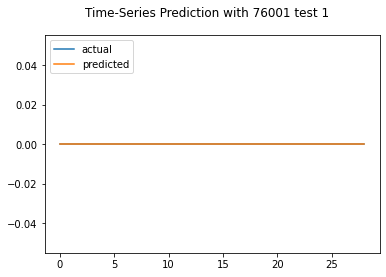

Restoring model weights from the end of the best epoch.
Epoch 00093: early stopping
Evaluate: 
1/1 [==============================] - 0s 40ms/step - loss: 0.0079 - auc: 1.0000 - acc: 1.0000 - f1_score: 0.3333
loss: 0.007918821647763252
auc: 1.0
acc: 1.0
f1_score: [0. 1. 0.]
{'loss': 0.007918821647763252, 'auc': 1.0, 'acc': 1.0, 'f1_score': array([0., 1., 0.], dtype=float32)}


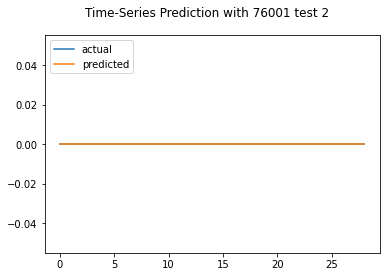

auc : average=1.000, std=0.000
acc : average=1.000, std=0.000
f1_score : average=0.331, std=0.469
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
##############################################################################################

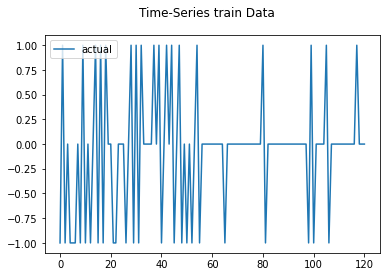

Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping
Evaluate: 
1/1 [==============================] - 0s 71ms/step - loss: 0.6870 - auc: 0.8356 - acc: 0.7931 - f1_score: 0.2949
loss: 0.6869715452194214
auc: 0.835612416267395
acc: 0.7931034564971924
f1_score: [0.         0.88461536 0.        ]
{'loss': 0.6869715452194214, 'auc': 0.835612416267395, 'acc': 0.7931034564971924, 'f1_score': array([0.        , 0.88461536, 0.        ], dtype=float32)}


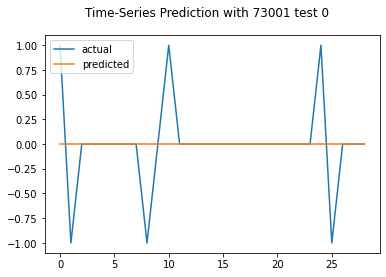

Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
Evaluate: 
1/1 [==============================] - 0s 40ms/step - loss: 0.6474 - auc: 0.8558 - acc: 0.7931 - f1_score: 0.2949
loss: 0.6474054455757141
auc: 0.8558263778686523
acc: 0.7931034564971924
f1_score: [0.         0.88461536 0.        ]
{'loss': 0.6474054455757141, 'auc': 0.8558263778686523, 'acc': 0.7931034564971924, 'f1_score': array([0.        , 0.88461536, 0.        ], dtype=float32)}


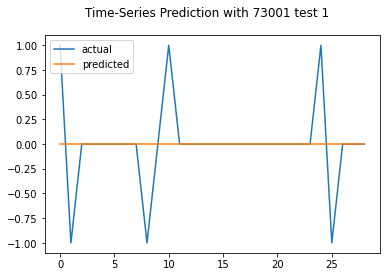

Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Evaluate: 
1/1 [==============================] - 0s 33ms/step - loss: 0.6427 - auc: 0.8707 - acc: 0.7931 - f1_score: 0.2949
loss: 0.6426635980606079
auc: 0.8706896305084229
acc: 0.7931034564971924
f1_score: [0.         0.88461536 0.        ]
{'loss': 0.6426635980606079, 'auc': 0.8706896305084229, 'acc': 0.7931034564971924, 'f1_score': array([0.        , 0.88461536, 0.        ], dtype=float32)}


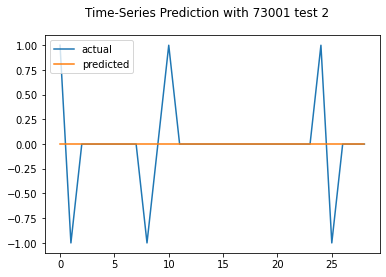

auc : average=0.854, std=0.014
acc : average=0.793, std=0.000
f1_score : average=0.295, std=0.417
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
##############################################################################################

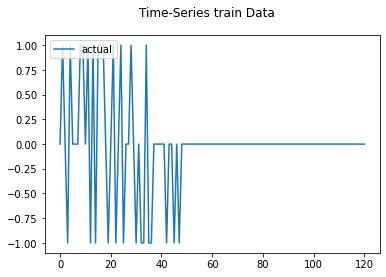

Restoring model weights from the end of the best epoch.
Epoch 00072: early stopping
Evaluate: 
1/1 [==============================] - 0s 29ms/step - loss: 0.0497 - auc: 1.0000 - acc: 1.0000 - f1_score: 0.3333
loss: 0.04972035437822342
auc: 1.0
acc: 1.0
f1_score: [0. 1. 0.]
{'loss': 0.04972035437822342, 'auc': 1.0, 'acc': 1.0, 'f1_score': array([0., 1., 0.], dtype=float32)}


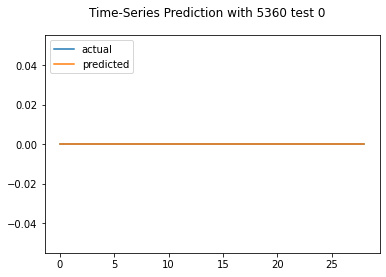

Restoring model weights from the end of the best epoch.
Epoch 00060: early stopping
Evaluate: 
1/1 [==============================] - 0s 30ms/step - loss: 0.1065 - auc: 1.0000 - acc: 1.0000 - f1_score: 0.3333
loss: 0.10653600841760635
auc: 0.9999999403953552
acc: 1.0
f1_score: [0. 1. 0.]
{'loss': 0.10653600841760635, 'auc': 0.9999999403953552, 'acc': 1.0, 'f1_score': array([0., 1., 0.], dtype=float32)}


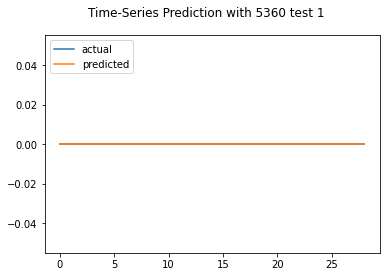

Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
Evaluate: 
1/1 [==============================] - 0s 69ms/step - loss: 0.1067 - auc: 1.0000 - acc: 1.0000 - f1_score: 0.3333
loss: 0.10670150816440582
auc: 1.0
acc: 1.0
f1_score: [0. 1. 0.]
{'loss': 0.10670150816440582, 'auc': 1.0, 'acc': 1.0, 'f1_score': array([0., 1., 0.], dtype=float32)}


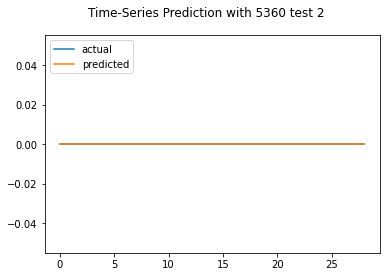

auc : average=1.000, std=0.000
acc : average=1.000, std=0.000
f1_score : average=0.333, std=0.471
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, classification=True)

In [7]:
results

{54001: {'rmse': [0.5903686285018921, 0.03903657799098259],
  'mape': [0.39080459872881573, 0.08127664296903472],
  'smape': [0.0, 0.0]},
 41001: {'rmse': [0.7653587063153585, 0.017269260098663756],
  'mape': [0.6551724076271057, 0.0],
  'smape': [0.2610323, 0.36922175]},
 5001: {'rmse': [0.9507530728975931, 0.006648528703195044],
  'mape': [0.8965517282485962, 0.0],
  'smape': [0.3151515, 0.44569156]},
 50001: {'rmse': [0.5647047360738119, 0.023245448125203214],
  'mape': [0.3333333383003871, 0.0708553407582467],
  'smape': [0.0, 0.0]},
 68001: {'rmse': [0.7903289794921875, 0.04372215346583695],
  'mape': [0.6551724076271057, 0.0],
  'smape': [0.2638889, 0.37319526]},
 8001: {'rmse': [0.5014863312244415, 0.0423099307097991],
  'mape': [0.36781610051790875, 0.03251065999740379],
  'smape': [0.0, 0.0]},
 23001: {'rmse': [0.4268727699915568, 0.01881168329775835],
  'mape': [0.28735631704330444, 0.016255322974227143],
  'smape': [0.0, 0.0]},
 76001: {'rmse': [1.00000003973643, 5.619579801